# Quickstart

This is a concise introduction to pyathena, aimed mainly at new users.

Start by importing the necessary modules.

To use pyathena, add its directory to the `PYTHONPATH` environment variable in `.bashrc` or `.bash_profile`
```
export PYTHONPATH=/path/to/directory:$PYTHONPATH
```
Alternatively, you can dynamically add the path in your script or notebook.

In [1]:
import sys
sys.path.insert(0, '..')
import pyathena as pa

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

## LoadSim class

The `LoadSim` class is the primary interface for handling Athena/Athena++ simulation data.

Use the `help()` function to access documentation for the class:
```
help(pa.LoadSim)
```

**Pro Tip:** Use `class_or_func_name?`, `class_or_func_name??`, `help(class_or_func_name)`, or Shift+Tab in an interactive Python environment to view documentation, summaries, or source code.

### Initialization

- **Simulation Directory:** `LoadSim` uses the `basedir` parameter to locate all output files (`hst`, `hdf5`, `vtk`, etc.).


- **Save Directory:** The `savdir` parameter defines the directory for saving pickles and figures. If unspecified, it defaults to `basedir`.


- **Logger:** A logger is attached to the `LoadSim` instance print out log messages. The verbosity can be adjusted by setting **`verbose`** to `True` (equivalent `"INFO"`) or `False` (equivalent `"WARNING"`) or different levels of logging `"DEBUG"`, `"INFO"`, `"WARNING"`, `"ERROR"` (case insensitive). The default is set to `False`.


- **Metadata** : During the initialization, `FindFiles` class is initialized within `LoadSim` and it tries to find the athinput file and (e.g., `athinput.runtime`) or a file (e.g., `out.txt`) where standard output is redirected to. It then reads in simulations parameters and code configuration and saves results to a dictionary of dictionaries, **`par`**, containing all information. Other important metadata include information about the computational domain (**`domain`**), the date and time when code was configured (**`config_time`**).


- **Finding files** : Find output files based on the information available from par. The `find_files()` method can be called to find file names (**`files`**) and lists of snapshot numbers (**`nums*`**) again. File formats include
    * Athena-TIGRESS : `hst`, `sn`, `zprof`, `vtk`, `starpar_vtk`, `rst`, `timeit`
    * TIGRIS : `hst`, `sn`, `zprof`, `hdf5`, `rst`, `loop_time/task_time`

In [2]:
import sys
sys.path.insert(0, '..')
import pyathena as pa

basedir = '/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/'
s = pa.LoadSim(basedir, verbose=True)

[LoadSim-INFO] basedir: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0
[LoadSim-INFO] savdir: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0
[LoadSim-INFO] load_method: pyathena
[FindFiles-INFO] athinput: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/out.txt
[FindFiles-INFO] athena_pp: False
[FindFiles-INFO] problem_id: R8_8pc_NCR
[FindFiles-INFO] vtk in tar: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/vtk nums: 200-668
[FindFiles-INFO] hst: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/hst/R8_8pc_NCR.hst
[FindFiles-INFO] sn: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/hst/R8_8pc_NCR.sn
[FindFiles-INFO] zprof: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/zprof nums: 200-668
[FindFiles-INFO] starpar_vtk: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/starpar nums: 200-668
[FindFiles-INFO] rst: /tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/rst/0010 nums: 10-34
[

### Attributes

Print some (read-only) attributes of a `LoadSim` instance.

In [3]:
s.basedir

'/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0'

In [4]:
s.basename

'R8_8pc_NCR.full.xy2048.eps0.0'

In [5]:
s.problem_id

'R8_8pc_NCR'

`domain` contains information about simulation domain
- Nx: Number of cells
- le/re: left/right edge
- Lx: box size
- dx: cell size

In [6]:
s.domain

{'Nx': array([128, 128, 768]),
 'ndim': 3,
 'le': array([ -512,  -512, -3072]),
 're': array([ 512,  512, 3072]),
 'Lx': array([1024, 1024, 6144]),
 'dx': array([8., 8., 8.]),
 'center': array([0., 0., 0.]),
 'time': None}

Date and time when the code is compiled

In [7]:
s.config_time

Timestamp('2022-05-18 14:19:25-0700', tz='US/Pacific')

`par` contains all input parameters and meta information

In [8]:
s.par.keys()

dict_keys(['job', 'log', 'output1', 'output2', 'output3', 'output4', 'output5', 'time', 'domain1', 'problem', 'feedback', 'cooling', 'opacity', 'radps', 'configure'])

In [9]:
s.par['configure'].keys()

dict_keys(['config_date', 'config_server', 'git_commit_ID', 'problem', 'gas', 'eq_state', 'nscalars', 'self-gravity', 'resistivity', 'viscosity', 'thermal_conduction', 'cooling', 'new_cooling', 'particles', 'sixray', 'radps', 'ionrad', 'lwrad', 'species_HI', 'species_H2', 'species_EL', 'species_CI', 'test_newcool', 'scalar_CL', 'star_particles', 'coord', 'special_relativity', 'order', 'flux', 'integrator', 'precision', 'write_ghost', 'mpi', 'H-correction', 'FFT', 'ShearingBox', 'RaytPlaneParallel', 'FARGO', 'FOFC', 'SMR'])

In [10]:
s.par['output2']

{'out_fmt': 'vtk',
 'out': 'prim',
 'dt': 1.0,
 'time': 201.0,
 'num': 200,
 'level': -1,
 'domain': -1,
 'id': 'out2',
 'new_output_directory': 1}

In [11]:
s.par['time']

{'selfg_no': 1,
 'cour_no': 0.3,
 'nlim': -1,
 'tlim': 700.0,
 'time': 200.0007,
 'nstep': 0}

In [12]:
s.par['problem']

{'gamma': 1.66666667,
 'surf': 12.0,
 'sz0': 10,
 'vturb': 10,
 'beta': 1,
 'qshear': 1.0,
 'Omega': 0.028,
 'SurfS': 42.0,
 'zstar': 245.0,
 'rhodm': 0.0064,
 'R0': 8000,
 'Sigma_SFR': 0.005,
 'Z_gas': 1.0,
 'Z_dust': 1.0,
 'xi_CR_amp': 1.0,
 'rho_crit': 1.0,
 'starpar_iacc': 0,
 'muH': 1.4,
 'Sigma_gas0': 10.0,
 'Sigma_SFR0': 0.0025,
 'tdecay_CR': -1.0}

Other attributes.

In [13]:
s.verbose # can be changed at any time

True

In [14]:
s.savdir

'/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0'

In [15]:
s.load_method

'pyathena'

In [16]:
s.out_fmt

['hst', 'vtk', 'starpar_vtk', 'rst', 'zprof']

### Finding files

**NOTE:** If `find_files()` did not succeed in finding output files under `basedir`, check if the glob patterns `s.ff.patterns` are set appropriately. Update it and try again. For example, the history dump is found using the glob patterns `/path_to_basedir/id0/*.hst` first. If it fails, it searches again with `/path_to_basedir/hst/*.hst`, and then with `/path_to_basedir/*.hst`

In [17]:
s.files.keys()

dict_keys(['athinput', 'vtk_tar', 'hst', 'sn', 'zprof', 'starpar_vtk', 'rst', 'timeit'])

In [18]:
s.files['vtk_tar'][0], s.files['vtk_tar'][-1]

('/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/vtk/R8_8pc_NCR.0200.tar',
 '/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/vtk/R8_8pc_NCR.0668.tar')

In [19]:
s.nums[0], s.nums[-1], s.nums_starpar[0], s.nums_starpar[-1]

(200, 668, 200, 668)

In [20]:
type(s.ff)

pyathena.find_files.FindFiles

In [21]:
s.ff.patterns.keys()

dict_keys(['athinput', 'hst', 'sphst', 'sn', 'vtk', 'vtk_id0', 'vtk_tar', 'vtk_athenapp', 'hdf5', 'starpar_vtk', 'partab', 'parhst', 'zprof', 'timeit', 'looptime', 'tasktime', 'rst'])

In [22]:
s.ff.patterns['hst']

[('id0', '*.hst'), ('hst', '*.hst'), ('*.hst',)]

In [23]:
s.ff.patterns['vtk']

[('vtk', '*.????.vtk'), ('*.????.vtk',)]

In [24]:
s.ff.patterns['hdf5']

[('hdf5', '*.out?.?????.athdf'), ('*.out?.?????.athdf',)]

## Units

Simulations run with Athena-TIGRESS/TIGRIS use the following code units

- TIGRESS-classic:

    - Mean particle mass per H: $\mu_{\rm H} = 1.4271$
    - $1\;{code\_density} \leftrightarrow n_{\rm H} = 1 {\rm cm}^{-3}$
    - Length : 1 pc
    - Velocity : 1 km/s
    

- TIGRESS-NCR:

    - Mean particle mass per H: $\mu_{\rm H} = 1.4$
    - $1\;{code\_density} \leftrightarrow n_{\rm H} = 1 {\rm cm}^{-3}$
    - Length : 1 pc
    - Velocity : 1 km/s
    

- TIGRIS with `"ism"` units:

    - Mean particle mass per H: $\mu_{\rm H} = 1.4$
    - $1.4\;{code\_density} \leftrightarrow \rho = 1.4 m_{\rm H}\;{\rm cm}^{-3} \leftrightarrow n_{\rm H} = 1 {\rm cm}^{-3}$
    - Length : 1 pc
    - Velocity : 1 km/s

In [25]:
u = s.u
# or
# u = pa.Units(kind='LV', muH=1.4)

Print code units (astropy Quantity)

In [26]:
type(s.u.time)

astropy.units.quantity.Quantity

In [27]:
s.u.time, s.u.mass, s.u.density, s.u.length, s.u.velocity, s.u.muH,

(<Quantity 3.08567758e+13 s>,
 <Quantity 0.03462449 solMass>,
 <Quantity 2.34335273e-24 g / cm3>,
 <Quantity 1. pc>,
 <Quantity 1. km / s>,
 1.4)

In [28]:
s.u.energy, s.u.energy_density, s.u.momentum, s.u.momentum_flux

(<Quantity 6.88476785e+41 erg>,
 <Quantity 2.34335273e-14 erg / cm3>,
 <Quantity 0.03462449 km solMass / s>,
 <Quantity 0.03541089 km solMass / (s yr kpc2)>)

Commonly used astronomical constants and units (plain numbers). Multiply them to convert quantities in code units to one in physical units. For example,

- `(code mass)*u.Msun = mass in Msun`
- `(code time)*u.Myr = time in Myr`
- `(code luminosity)*u.Lsun = luminosity in Lsun`
- `(code pressure)*u.pok = P/k_B in cm^-3 K`

In [29]:
s.u.Msun, s.u.Myr, s.u.Lsun, s.u.pc,  s.u.kms, s.u.pok

(0.034624490427439196,
 0.9777922216807893,
 5.82863455377993e-06,
 1.0,
 1.0,
 169.7283473776405)

## VTK dump

In [30]:
print(s.nums[0], s.nums[-1], len(s.nums)) # vtk file numbers in the directory

200 668 469


In [31]:
ds = s.load_vtk(num=s.nums[0])

[LoadSim-INFO] [load_vtk_tar]: R8_8pc_NCR.0200.tar. Time: 200.000700


In [32]:
ds.domain

{'all_grid_equal': True,
 'ngrid': 384,
 'le': array([ -512.,  -512., -3072.], dtype=float32),
 're': array([ 512.,  512., 3072.], dtype=float32),
 'dx': array([8., 8., 8.], dtype=float32),
 'Lx': array([1024., 1024., 6144.], dtype=float32),
 'center': array([0., 0., 0.], dtype=float32),
 'Nx': array([128, 128, 768]),
 'ndim': 3,
 'time': 200.0007}

In [33]:
ds.domain == s.domain

True

Note that `domain['time']` is updated after reading loading a vtk file.

### Field names

The `field_list` contains all available variable names in vtk file, representing the raw data. The `derived_field_list` includes variables that are calculated based on those in the `field_list`, often expressed in more convenient units. Usually, fields in `derived_field_list` are in more convenient units.  When in doubt, it is recommended to use variables from the `field_list` and calculate derived quantities yourself.

In [34]:
print(ds.field_list)

['density', 'velocity', 'pressure', 'cell_centered_B', 'gravitational_potential', 'temperature', 'heat_rate', 'cool_rate', 'net_cool_rate', 'CR_ionization_rate', 'rad_energy_density_PH', 'rad_energy_density_LW', 'rad_energy_density_PE', 'rad_energy_density_LW_diss', 'specific_scalar[0]', 'specific_scalar[1]', 'xHI', 'xH2', 'xe']


In [35]:
print(ds.derived_field_list)

['rho', 'nH', 'pok', 'r', 'vmag', 'vr', 'vx', 'vy', 'vz', 'cs', 'csound', 'Mr', 'Mr_abs', 'rhovr2ok', 'T', 'Td', 'cool_rate', 'heat_rate', 'net_cool_rate', 'Lambda_cool', 'nHLambda_cool', 'nHLambda_cool_net', 'Gamma_heat', 't_cool', 'vAmag', 'vAx', 'vAy', 'vAz', 'Bx', 'By', 'Bz', 'Bmag', 'nH2', '2nH2', 'xH2', '2xH2', 'nHI', 'xHI', 'nHII', 'xHII', 'nHn', 'xn', 'ne', 'nesq', 'xe', 'xCI', 'nCI', 'xOII', 'xCII', 'xCII_alt', 'xi_CR', 'T_alt', 'chi_PE', 'chi_LW', 'chi_FUV', 'Erad_LyC', 'Jphot_LyC', 'Uion', 'j_Halpha', 'Erad_FUV', 'heat_ratio', 'NHeff', 'heat_rate_HI_phot', 'heat_rate_H2_phot', 'heat_rate_dust_LyC', 'heat_rate_dust_FUV', 'heat_rate_dust_UV', 'psi_gr', 'eps_pe', 'Gamma_pe', 'chi_H2', 'chi_CI', 'fshld_H2', 'j_X']


In [36]:
ds.dirname, ds.ext

('/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.xy2048.eps0.0/vtk', 'tar')

### Read 3d data cubes

With ``xarray=True`` option (default is True), read dataset as a xarray DataSet.

See http://xarray.pydata.org/en/stable/quick-overview.html for a quick overview of xarray.

In [37]:
help(ds.get_field) # Note: setting (le, re) manually may not work as intended

Help on method get_field in module pyathena.io.read_vtk:

get_field(field='density', le=None, re=None, as_xarray=True) method of pyathena.io.read_vtk_tar.AthenaDataSetTar instance
    Read 3d fields data.
    
    Parameters
    ----------
    field : (list of) string
        The name of the field(s) to be read.
    le : sequence of floats
       Left edge. Default value is the domain left edge.
    re : sequence of floats
       Right edge. Default value is the domain right edge.
    as_xarray : bool
       If True, returns results as an xarray Dataset. If False, returns a
       dictionary containing numpy arrays. Default value is True.
    
    Returns
    -------
    dat : xarray dataset
        An xarray dataset containing fields.



In [38]:
dat = ds.get_field(['nH', 'pok', 'T'])

Indexing follows the convention of the Athena code (k,j,i): for scalar fields, the innermost (fastest running) index is the x-direction, while the outermost index is the z-direction

In [39]:
dat['nH'].shape

(768, 128, 128)

In [40]:
dat

<xarray.Dataset>
Dimensions:  (x: 128, y: 128, z: 768)
Coordinates:
  * x        (x) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0
  * y        (y) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0
  * z        (z) float64 -3.068e+03 -3.06e+03 -3.052e+03 ... 3.06e+03 3.068e+03
Data variables:
    nH       (z, y, x) float32 0.0001338 0.0001325 ... 0.0003592 0.0003528
    T        (z, y, x) float32 2.277e+06 2.316e+06 ... 2.397e+06 2.451e+06
    pok      (z, y, x) float32 700.5 705.4 707.3 ... 1.98e+03 1.988e+03
Attributes:
    all_grid_equal:  True
    num:             200
    ngrid:           384
    le:              [ -512.  -512. -3072.]
    re:              [ 512.  512. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [1024. 1024. 6144.]
    center:          [0. 0. 0.]
    Nx:              [128 128 768]
    ndim:            3
    time:            200.0007
    dfi:             {'rho': {'field_dep': ['density'], 'func': <function set...

In [41]:
dat.x

<xarray.DataArray 'x' (x: 128)>
array([-508., -500., -492., -484., -476., -468., -460., -452., -444., -436.,
       -428., -420., -412., -404., -396., -388., -380., -372., -364., -356.,
       -348., -340., -332., -324., -316., -308., -300., -292., -284., -276.,
       -268., -260., -252., -244., -236., -228., -220., -212., -204., -196.,
       -188., -180., -172., -164., -156., -148., -140., -132., -124., -116.,
       -108., -100.,  -92.,  -84.,  -76.,  -68.,  -60.,  -52.,  -44.,  -36.,
        -28.,  -20.,  -12.,   -4.,    4.,   12.,   20.,   28.,   36.,   44.,
         52.,   60.,   68.,   76.,   84.,   92.,  100.,  108.,  116.,  124.,
        132.,  140.,  148.,  156.,  164.,  172.,  180.,  188.,  196.,  204.,
        212.,  220.,  228.,  236.,  244.,  252.,  260.,  268.,  276.,  284.,
        292.,  300.,  308.,  316.,  324.,  332.,  340.,  348.,  356.,  364.,
        372.,  380.,  388.,  396.,  404.,  412.,  420.,  428.,  436.,  444.,
        452.,  460.,  468.,  476.,  484.,  492.,  500.,  508.])
Coordinates:
  * x        (x) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0

Mean value of nH, pressure/kB at the midplane

In [42]:
dat.sel(z=0, method='nearest').mean()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    z        float64 4.0
Data variables:
    nH       float32 0.8858
    T        float32 6.296e+05
    pok      float32 9.153e+03

### Slice plots


- Use `dat.dfi` or `s.dfi` (derived field info) to set plot arguments
- See also https://docs.xarray.dev/en/latest/generated/xarray.plot.imshow.html

In [43]:
dat.dfi['nH']

{'field_dep': ['density'],
 'func': <function pyathena.fields.fields.set_derived_fields_def.<locals>._nH(d, u)>,
 'label': '$n_{\\rm H}\\;[{\\rm cm^{-3}}]$',
 'norm': <matplotlib.colors.LogNorm at 0x14a046191780>,
 'vminmax': (0.001, 10000.0),
 'cmap': 'Spectral_r',
 'scale': 'log',
 'take_log': True,
 'imshow_args': {'norm': <matplotlib.colors.LogNorm at 0x14a046191780>,
  'cmap': 'Spectral_r',
  'cbar_kwargs': {'label': '$n_{\\rm H}\\;[{\\rm cm^{-3}}]$'}}}

Text(0.5, 0.98, 'time=200.0007')

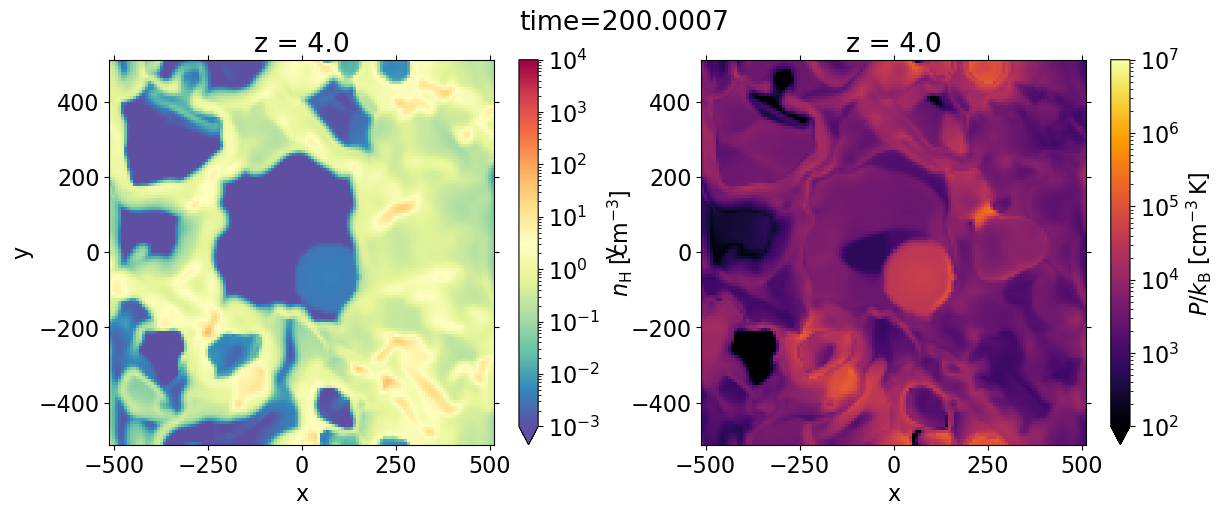

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
dat['nH'].sel(z=0, method='nearest').plot.imshow(ax=axes[0], **dat.dfi['nH']['imshow_args'])
dat['pok'].sel(z=0, method='nearest').plot.imshow(ax=axes[1], **dat.dfi['pok']['imshow_args'])
plt.setp(axes, aspect='equal')
plt.suptitle(f'time={dat.time}')

Another example: plot slice of density and temperature at z=0

In [45]:
d = ds.get_field(['nH', 'T'])

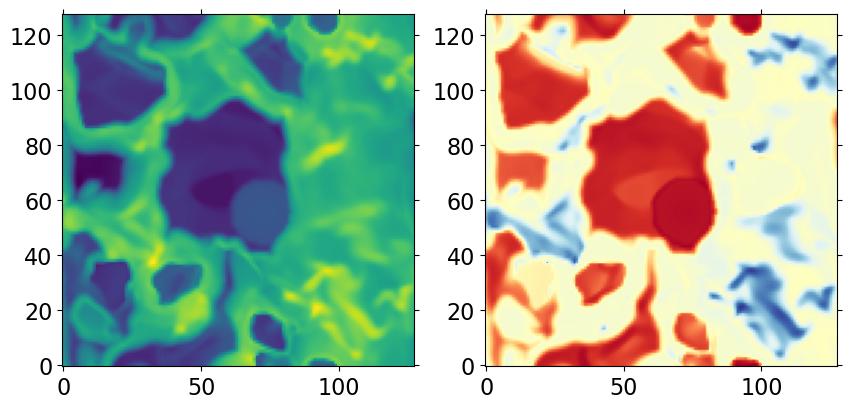

In [46]:
from pyathena.plt_tools.cmap_shift import cmap_shift
iz = ds.domain['Nx'][2] // 2
fig, axes = plt.subplots(1, 2, figsize=(10,5))
cmap_temp = cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)
axes[0].imshow(d['nH'][iz,:,:], norm=LogNorm(), origin='lower')
axes[1].imshow(d['T'][iz,:,:], norm=LogNorm(), origin='lower',
               cmap=cmap_temp)

#### `get_slice()` method

In [47]:
help(ds.get_slice)

Help on method get_slice in module pyathena.io.read_vtk:

get_slice(axis, field='density', pos='c', method='nearest') method of pyathena.io.read_vtk_tar.AthenaDataSetTar instance
    Read slice of fields.
    
    Parameters
    ----------
    axis : str
        Axis to slice along. 'x' or 'y' or 'z'
    field : (list of) str
        The name of the field(s) to be read.
    pos : float or str
        Slice through If 'c' or 'center', get a slice through the domain
        center. Default value is 'c'.
    method : str
    
    
    Returns
    -------
    slc : xarray dataset
        An xarray dataset containing slices.



In [48]:
slc = ds.get_slice('y', ['nH', 'T', 'pressure']) # x-z slices

In [49]:
slc

<xarray.Dataset>
Dimensions:   (z: 768, x: 128)
Coordinates:
  * x         (x) float64 -508.0 -500.0 -492.0 -484.0 ... 492.0 500.0 508.0
    y         float64 4.0
  * z         (z) float64 -3.068e+03 -3.06e+03 -3.052e+03 ... 3.06e+03 3.068e+03
Data variables:
    pressure  (z, x) float32 2.693 2.68 2.657 2.631 ... 11.88 11.52 11.16 10.87
    nH        (z, x) float32 0.0001072 0.0001052 ... 0.0004483 0.0004352
    T         (z, x) float32 1.855e+06 1.881e+06 ... 1.839e+06 1.844e+06
Attributes:
    all_grid_equal:  True
    num:             200
    ngrid:           384
    le:              [ -512.  -512. -3072.]
    re:              [ 512.  512. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [1024. 1024. 6144.]
    center:          [0. 0. 0.]
    Nx:              [128 128 768]
    ndim:            3
    time:            200.0007
    dfi:             {'rho': {'field_dep': ['density'], 'func': <function set...

In [50]:
type(slc), type(slc.nH), type(slc.nH.data)

(xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray, numpy.ndarray)

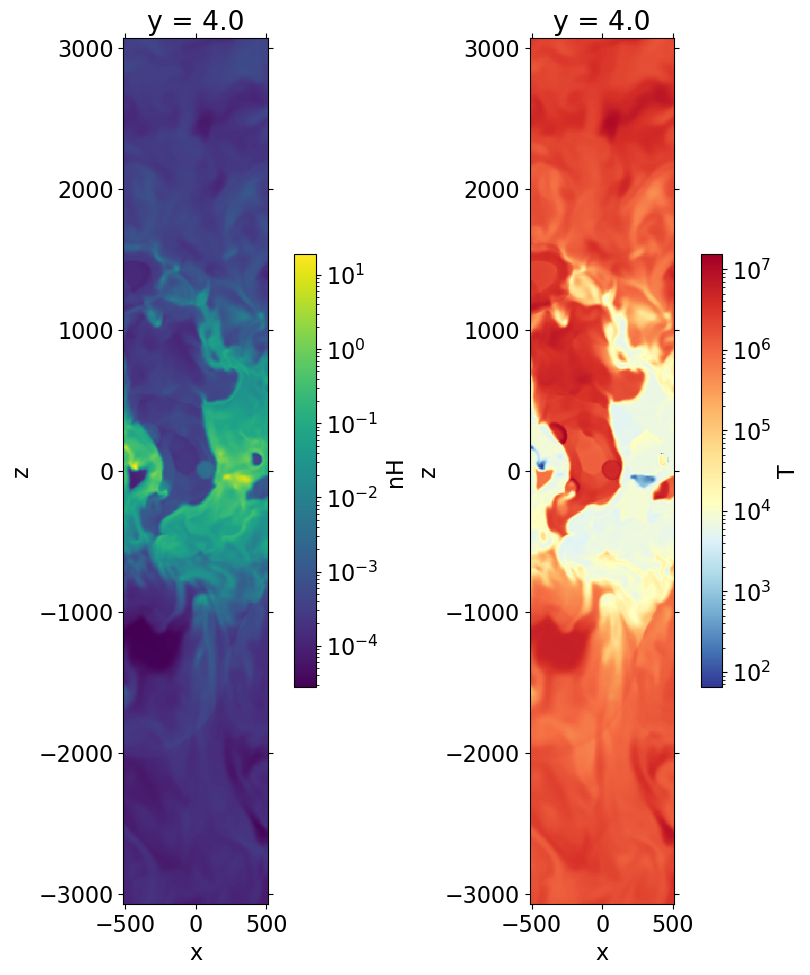

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(8, 12), constrained_layout=True)
im1 = slc['nH'].plot(ax=axes[0], norm=LogNorm())
im2 = slc['T'].plot(ax=axes[1], norm=LogNorm(), cmap=cmap_temp)
for im in (im1, im2):
    im.axes.set_aspect('equal')

## 2d histogram

Text(0, 0.5, '$\\log_{10}\\,T$')

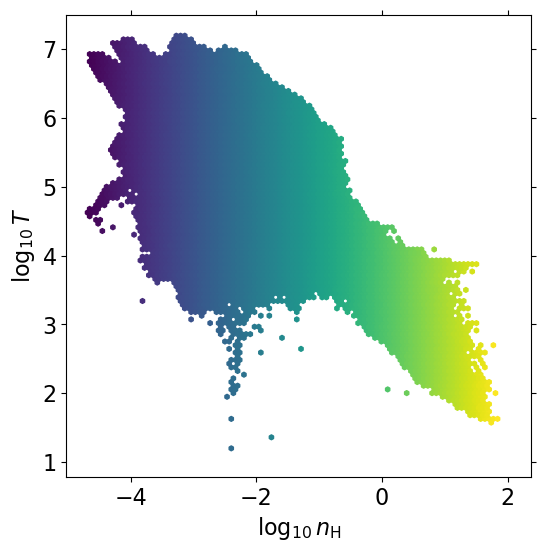

In [52]:
lognH = np.log10(dat['nH'].data.flatten())
logT = np.log10(dat['T'].data.flatten())
# mass-weighted histograms
wgt = dat['nH'].data.flatten()
plt.hexbin(lognH, logT, wgt, mincnt=1, norm=mpl.colors.LogNorm())
plt.xlabel(r'$\log_{10}\,n_{\rm H}$')
plt.ylabel(r'$\log_{10}\,T$')

## Plot projection and star particles

In [53]:
sp = s.load_starpar_vtk(num=s.nums_starpar[0])
sp.columns

[LoadSim-INFO] [load_starpar_vtk]: R8_8pc_NCR.0200.starpar.vtk. Time: 200.000700


Index(['id', 'flag', 'n_ostar', 'mass', 'age', 'mage', 'metal_mass[0]',
       'metal_mass[1]', 'metal_mass[2]', 'metal_mass[3]', 'metal_mass[4]',
       'x1', 'x2', 'x3', 'v1', 'v2', 'v3'],
      dtype='object')

In [54]:
sp

,id,flag,n_ostar,mass,age,mage,metal_mass[0],metal_mass[1],metal_mass[2],metal_mass[3],metal_mass[4],x1,x2,x3,v1,v2,v3
0,0,-2,0,1.517063e+05,231.347687,231.347687,0.0,0.0,0.0,0.0,0.0,-128.291458,-450.330017,34.969208,-3.673561,-0.497162,2.552266
1,1,-2,0,1.142920e+05,200.281982,200.281982,0.0,0.0,0.0,0.0,0.0,-451.638062,448.136475,1.251051,-1.985113,13.861067,-0.561060
2,2,-2,0,1.029942e+06,219.190628,219.190628,0.0,0.0,0.0,0.0,0.0,-352.151489,-204.598938,3.780031,5.817396,9.692892,-1.035785
3,3,-2,0,2.885881e+05,236.061691,236.061691,0.0,0.0,0.0,0.0,0.0,-46.320374,399.499939,-45.633480,1.270643,1.333141,7.092731
4,4,-2,0,8.737053e+04,224.225128,224.225128,0.0,0.0,0.0,0.0,0.0,-169.073090,-75.030182,-7.814175,9.002285,5.097887,-2.412747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,3619,-1,0,0.000000e+00,-9.412859,12.259128,0.0,0.0,0.0,0.0,0.0,-17.949648,-436.911743,68.887535,14.285395,42.216995,70.368149
265,3620,-1,0,0.000000e+00,-0.123773,4.554963,0.0,0.0,0.0,0.0,0.0,250.112442,487.829712,-12.737943,-6.930785,-8.410844,22.714880
266,3621,-1,0,0.000000e+00,-24.058840,4.369840,0.0,0.0,0.0,0.0,0.0,-214.895584,-250.390366,-6.121937,-21.697975,38.959778,-75.154793
267,3622,-1,0,0.000000e+00,-15.175461,12.259128,0.0,0.0,0.0,0.0,0.0,-19.128952,-454.030334,57.308399,13.182298,-40.273441,46.820534


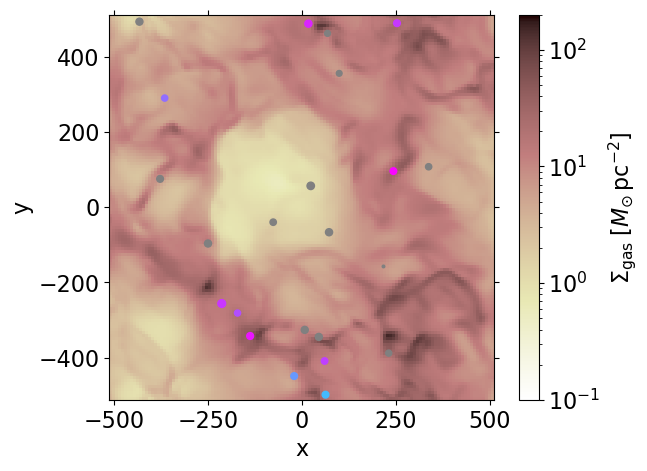

In [55]:
from pyathena.plt_tools.plt_starpar import scatter_sp

fig, ax = plt.subplots(1, 1, figsize=(6.5, 5))
d = ds.get_field('rho')
conv_Sigma = (1.0*au.g/au.cm**2).to('Msun pc-2').value
dz_cgs = ds.domain['dx'][2]*u.length.cgs.value

(d['rho'].sum(dim='z')*dz_cgs*conv_Sigma).plot.imshow(ax=ax,
    cmap='pink_r', norm=mpl.colors.LogNorm(0.1, 2e2),
    cbar_kwargs=dict(label=r'$\Sigma_{\rm gas}\;[M_{\odot}\,{\rm pc}^{-2}]$'))
ax.set_aspect('equal')

# Plot projected positions of star particles
# age < agemax : colored circles
# agemax < age_Myr < agemax_sn : grey circles
# with agemax = 20 Myr ; agemax_sn = 40Myr
scatter_sp(sp, ax, dim='z')

## LoadSimTIGRESSNCR class

For TIGRESS-classic and TIGRESS-NCR simulations, many derived information (such as total luminosity, number of sources) are calculated in `pyathena/tigress_ncr/starpar.py`

In [56]:
from pyathena.tigress_ncr.load_sim_tigress_ncr import LoadSimTIGRESSNCR

s = LoadSimTIGRESSNCR(basedir)
# s.print_all_properties()

Suppress warning

In [57]:
s.verbose = 'ERROR' 

If you do not have permission to `basedir`, save pickles to a different directory, e.g., /home/USERNAME/basename/

In [58]:
s.savdir = os.path.join(os.path.expanduser('~'), s.basename)
star = s.read_starpar_all(force_override=True, savdir=s.savdir)
star.keys()

Index(['time', 'nstars', 'isrc', 'nsrc', 'sp_src', 'z_max', 'z_min',
       'z_mean_mass', 'z_mean_Qi', 'z_mean_LFUV', 'stdz_mass', 'stdz_Qi',
       'stdz_LFUV', 'Qi_tot', 'L_LW_tot', 'L_PE_tot', 'L_FUV_tot', 'Phi_i',
       'Sigma_FUV', 'sp'],
      dtype='object')

[Text(0.5, 0, 'time [Myr]'), Text(0, 0.5, 'Qi_tot')]

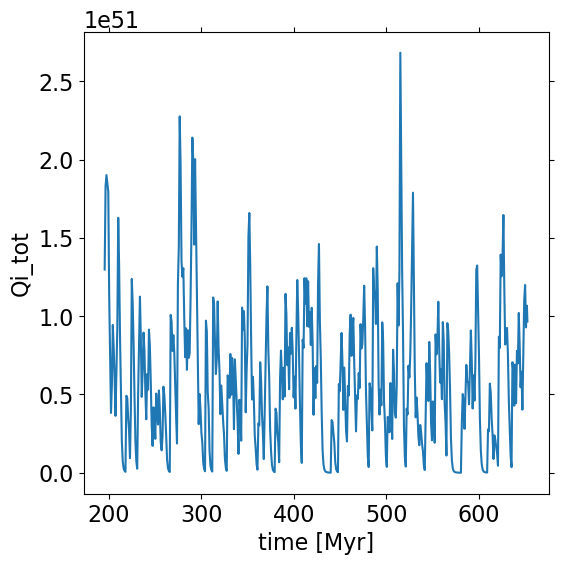

In [59]:
plt.plot(star['time']*s.u.Myr, star['Qi_tot']) # Total ionizing photon rate [1/s]
plt.setp(plt.gca(), xlabel='time [Myr]', ylabel='Qi_tot')

## History dump

In [65]:
# Read raw hst dump
h = pa.read_hst(s.files['hst']) # returns a pandas DataFrame object
h.columns

Index(['time', 'dt', 'mass', 'totalE', 'x1Mom', 'x2Mom', 'x3Mom', 'x1KE',
       'x2KE', 'x3KE', 'x1ME', 'x2ME', 'x3ME', 'gravPE', 'scalar0', 'scalar1',
       'scalar2', 'scalar3', 'scalar4', 'dmasssink', 'dM1sink', 'dM2sink',
       'dM3sink', 'dEsink', 'heat_ratio', 'heat_ratio_mid',
       'heat_ratio_mid_2p', 'ftau', 'x2dke', 'nmid', 'Pth_mid', 'Pturb_mid',
       'Vmid_2p', 'nmid_2p', 'Pth_mid_2p', 'Pturb_mid_2p', 'sfr10', 'sfr40',
       'sfr100', 'msp', 'metal_sp', 'total_ecool', 'total_eheat', 'total_enet',
       'V_Erad_PH', 'Lmasked_HI_PH', 'Lmasked_H2_PH', 'Lmasked_dust_PH',
       'Lmasked_dust_LW', 'Lmasked_dust_PE', 'phot_rate_HI', 'phot_rate_H2',
       'rec_rate_rad_HII', 'rec_rate_gr_HII', 'xi_CR0', 'Ltot0', 'Ltot1',
       'Ltot2', 'Ltot3', 'Lesc0', 'Lesc1', 'Lesc2', 'Lesc3', 'Ldust0',
       'Ldust1', 'Ldust2', 'Ldust3', 'Lxymax0', 'Lxymax1', 'Lxymax2',
       'Lxymax3', 'Lpp0', 'Lpp1', 'Lpp2', 'Lpp3'],
      dtype='object')

In [61]:
h.head()

,time,dt,mass,totalE,x1Mom,x2Mom,x3Mom,x1KE,x2KE,x3KE,...,Ldust2,Ldust3,Lxymax0,Lxymax1,Lxymax2,Lxymax3,Lpp0,Lpp1,Lpp2,Lpp3
0,200.000700,0.002155,0.052018,24.523072,-0.010668,-0.114090,0.149412,2.067014,3.001098,3.706466,...,2.404333e+12,653.116688,4.696874e+09,1.815048e+09,2.867097e+10,5.840392e+11,0.0,2.298291e+11,1.069728e+12,2.893340e+12
1,200.011568,0.002198,0.052018,24.417614,-0.010663,-0.114099,0.149376,2.056071,2.992799,3.695838,...,2.404154e+12,653.411037,4.695982e+09,1.814261e+09,2.866940e+10,5.840334e+11,0.0,2.299529e+11,1.069950e+12,2.893498e+12
2,200.020375,0.002232,0.052018,24.338644,-0.010658,-0.114106,0.149347,2.047250,2.986004,3.686907,...,2.398275e+12,650.927607,4.816156e+09,1.817778e+09,2.867580e+10,5.828847e+11,0.0,2.297048e+11,1.068698e+12,2.887522e+12
3,200.031582,0.002255,0.052018,24.242892,-0.010653,-0.114116,0.149309,2.036098,2.977272,3.675242,...,2.391494e+12,648.406112,4.969366e+09,1.817014e+09,2.865399e+10,5.816466e+11,0.0,2.297736e+11,1.068160e+12,2.881460e+12
4,200.040671,0.002297,0.052018,24.166606,-0.010648,-0.114124,0.149279,2.027186,2.970138,3.665638,...,2.391494e+12,648.406112,4.969366e+09,1.817014e+09,2.865399e+10,5.816466e+11,0.0,2.297736e+11,1.068160e+12,2.881460e+12


Plot

- timestep size `dt_mhd` (code unit)
- (total gas mass)/(volume of box) (code units)
- $\Sigma_{\rm SFR,40 Myr}$ (Msun/yr/kpc^2)

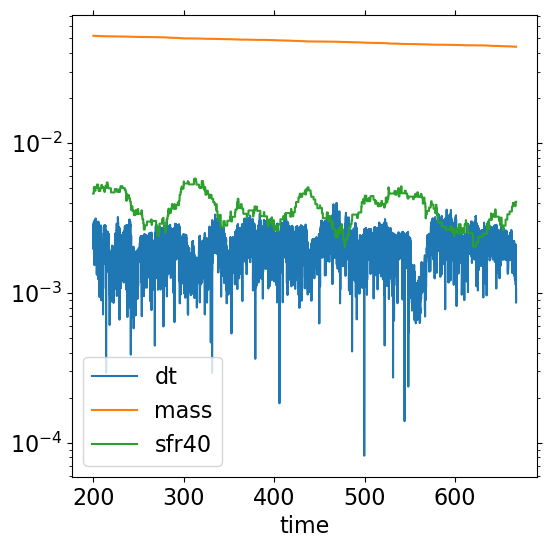

In [62]:
ax = h.plot('time', y=['dt','mass', 'sfr40'])
ax.set_yscale('log')

Read history dump post-processed (and saved to a pickle) using the script `pyathena/tigress_ncr/hst.py`

In [63]:
h = s.read_hst()

In [64]:
h.columns

Index(['time_code', 'time', 'time_orb', 'dt_code', 'dt', 'mass', 'mass_sp',
       'mass0', 'mass1', 'mass2', 'mass3', 'mass4', 'M_HI', 'Sigma_HI', 'M_H2',
       'Sigma_H2', 'M_HII', 'Sigma_HII', 'massflux_lbd_d', 'massflux_ubd_d',
       'mass_out', 'Sigma_gas', 'Sigma_sp', 'Sigma_out', 'mass_snej',
       'Sigma_snej', 'H', 'mf_c', 'vf_c', 'H_c', 'mf_u', 'vf_u', 'H_u',
       'mf_w1', 'vf_w1', 'H_w1', 'mf_w2', 'vf_w2', 'H_w2', 'mf_h1', 'vf_h1',
       'H_h1', 'mf_h2', 'vf_h2', 'H_h2', 'mf_w', 'vf_w', 'H_w', 'mf_2p',
       'vf_2p', 'H_2p', 'KE', 'ME', 'v1', 'vA1', 'v1_2p', 'v2', 'vA2', 'v2_2p',
       'v3', 'vA3', 'v3_2p', 'cs', 'Pth_mid', 'Pth_mid_2p', 'Pturb_mid',
       'Pturb_mid_2p', 'nmid', 'nmid_2p', 'sfr10', 'sfr40', 'sfr100',
       'Ltot_PH', 'Lesc_PH', 'Ldust_PH', 'Qtot_PH', 'Qesc_PH', 'Qtot_cum_PH',
       'Qesc_cum_PH', 'fesc_PH', 'fesc_cum_PH', 'Ltot_LW', 'Lesc_LW',
       'Ldust_LW', 'Qtot_LW', 'Qesc_LW', 'Qtot_cum_LW', 'Qesc_cum_LW',
       'fesc_LW', 'fesc_cum_LW', 